<a href="https://colab.research.google.com/github/LinEddie0290/stats201-PS1-Eddie/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 0: Set Up

In [ ]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/LinEddie0290/stats201-PS1-Eddie/main/data/Cited.csv")
df 

Title  \
0   Non-Fungible Token (NFT): Overview, Evaluation...   
1   Mapping the NFT revolution: market trends, tra...   
2       Quantifying NFT driven networks in crypto art   
3   Non-fungible token (NFT) markets on the Ethere...   
4   The Non-Fungible Token (NFT) Market and Its Re...   
5   TweetBoost: Influence of Social Media on NFT V...   
6   Understanding Security Issues in the NFT Ecosy...   
7   The NFT Hype: What Draws Attention to Non-Fung...   
8   The Evolution of Nonfungible Tokens: Complexit...   
9   Non-Fungible Tokens (NFT). The Analysis of Ris...   
10  Non-Fungible Tokens (NFT)  Innovation beyond t...   
11  NFT, copyright and intellectual property comme...   
12  NFT Wash Trading: Quantifying suspicious behav...   
13  A Blockchain Based Decentralized Computing And...   
14  What is Non-fungible token (NFT)? A short disc...   
15  Tokenfication - The potential of non-fungible ...   
16  When makers meet the metaverse: Effects of cre...   

                                             Abstract  
0   The Non-Fungible Token (NFT) market is mushroo...  
1   Non Fungible Tokens (NFTs) are digital assets ...  
2   The evolution of the art ecosystem is driven b...  
3   The market for non-fungible tokens (NFTs), tra...  
4   Non-fungible tokens (NFTs) are transferrable r...  
5   NFT or Non-Fungible Token is a token that cert...  
6   Non-Fungible Tokens (NFTs) have emerged as a w...  
7   Non-fungible tokens (NFTs) can be used to repr...  
8   Nonfungible tokens (NFTs) have recently drawn ...  
9   This study examines the risk and return charac...  
10   The COVID-19 pandemic has pushed digitalizati...  
11  The invention of disruptive technologies broad...  
12  The smart contract-based markets for non-fungi...  
13  The market value of the Gaming industry was sa...  
14  Non-fungible tokens (NFTs) may initially sound...  
15  In recent years, there has been an increase in...  
16  The main purpose of this paper is to conduct e...

# Part 1: The Word Cloud

## 1.1. Title

In [ ]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'Non-Fungible Token (NFT): Overview, Evaluation, Opportunities and Challenges,Mapping the NFT revolution: market trends, trade networks, and visual features,Quantifying NFT driven networks in crypto art,Non-fungible token (NFT) markets on the Ethereum blockchain: temporal development, cointegration and interrelations,The Non-Fungible Token (NFT) Market and Its Relationship with Bitcoin and Ethereum,TweetBoost: Influence of Social Media on NFT Valuation,Understanding Security Issues in the NFT Ecosystem,The NFT Hype: What Draws Attention to Non-Fungible Tokens?,The Evolution of Nonfungible Tokens: Complexity and Novelty of NFT Use-Cases,Non-Fungible Tokens (NFT). The Analysis of Risk and Return,Non-Fungible Tokens (NFT)  Innovation beyond the craze,NFT, copyright and intellectual property commercialization,NFT Wash Trading: Quantifying suspicious behaviour in NFT markets,A Blockchain Based Decentralized Computing And NFT Infrastructure For Game Networks,What is Non-fungible token (NFT)?

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend([',',"NFT","what",":","A","on","in","into","the","for","review", "non", "fungible", "token", "Tokens"])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

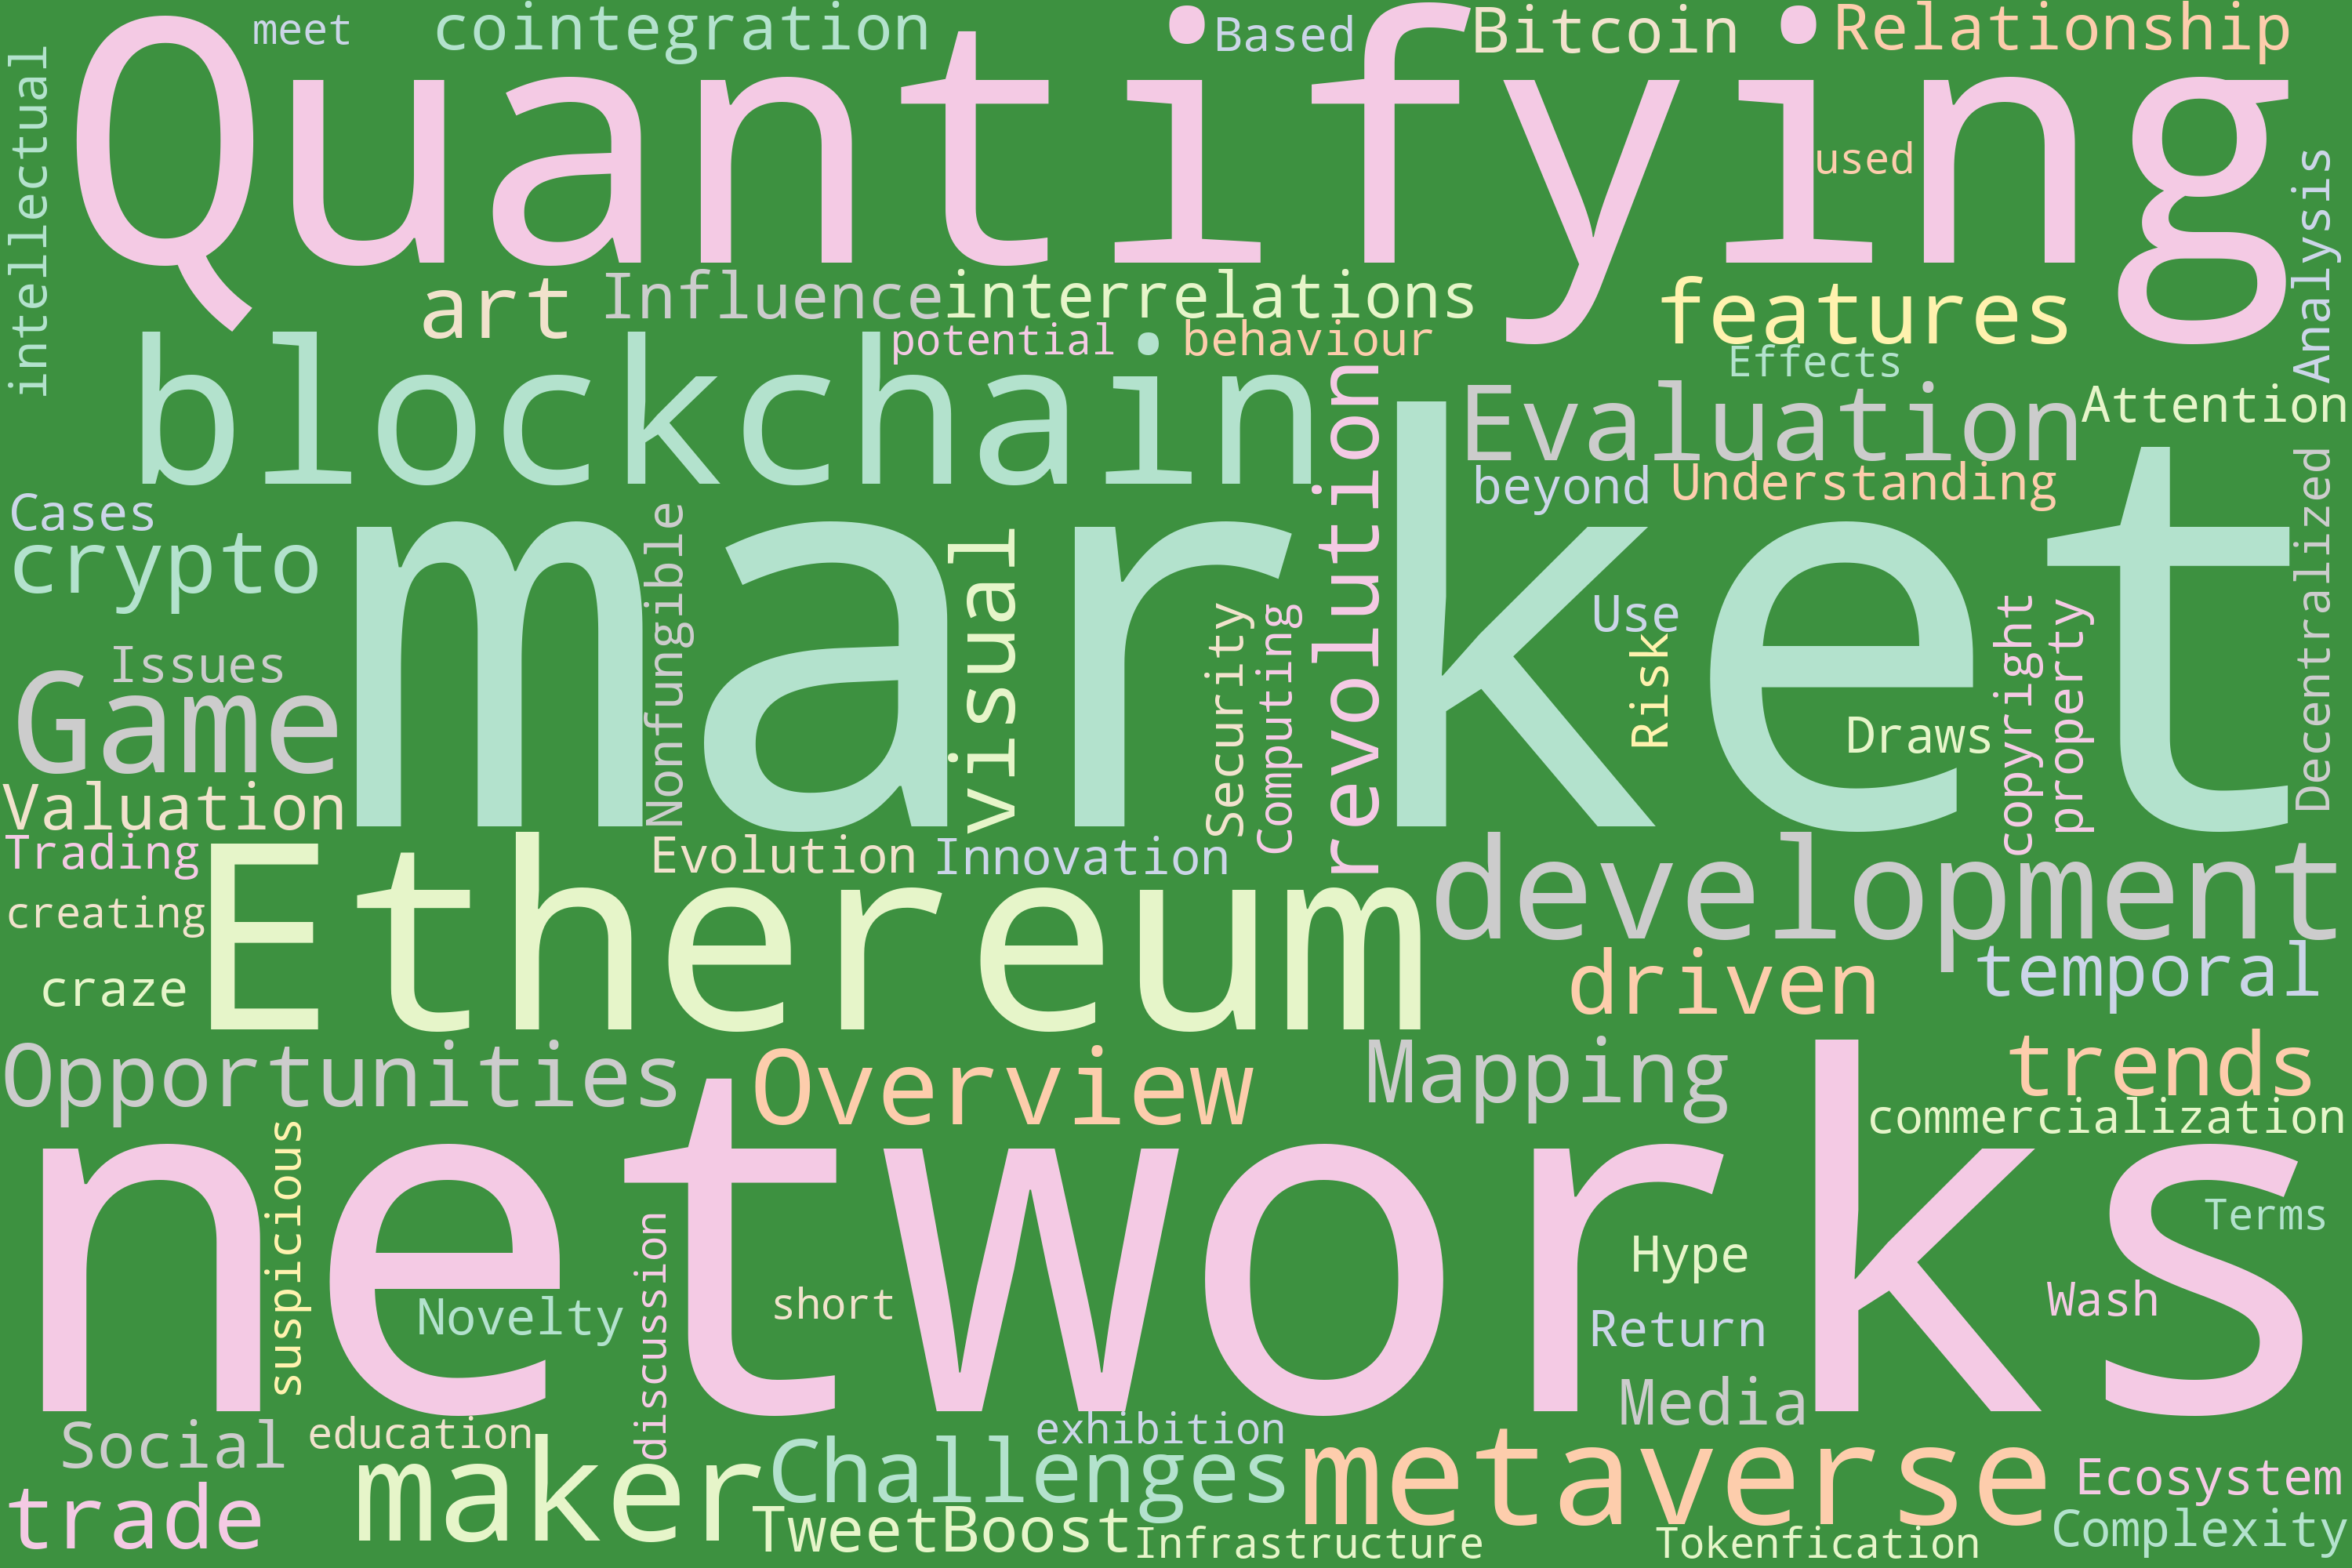

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

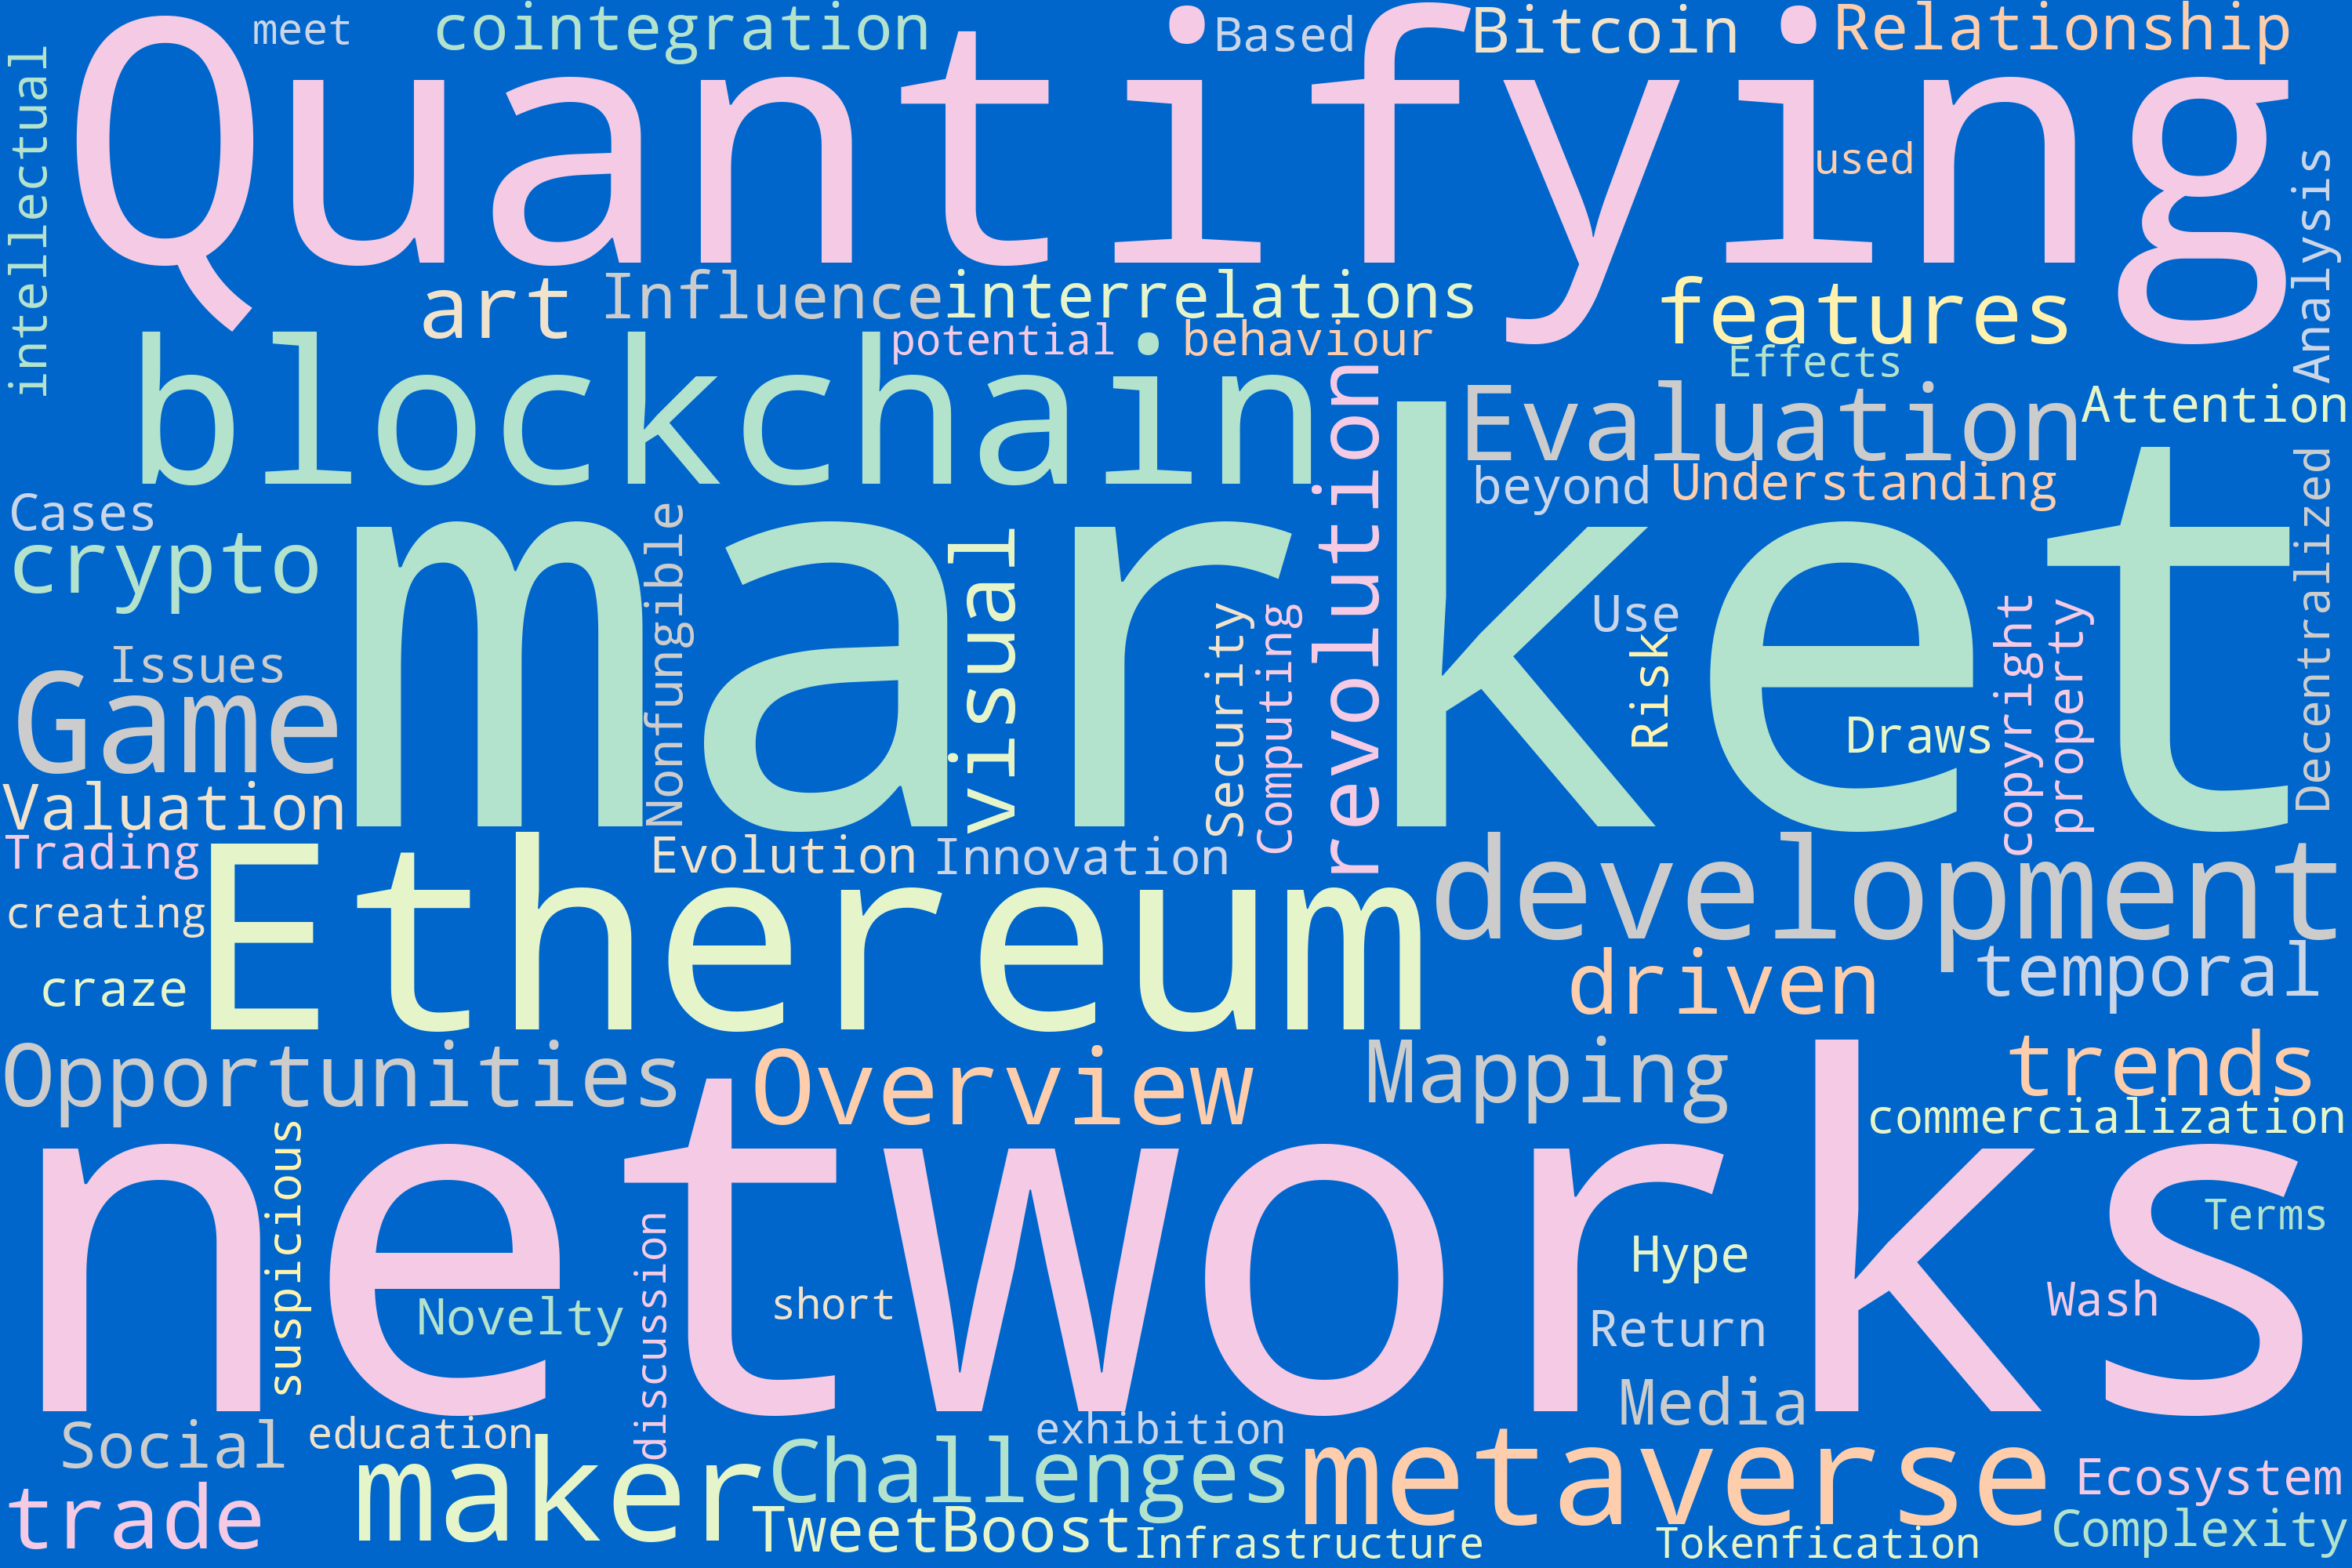

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2 Abstract


In [ ]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

"The Non-Fungible Token (NFT) market is mushrooming in recent years. The concept of NFT originally comes from a token standard of Ethereum, aiming to distinguish each token with distinguishable signs. This type of token can be bound with virtual/digital properties as their unique identifications. With NFTs, all marked properties can be freely traded with customized values according to their ages, rarity, liquidity, etc. It has greatly stimulated the prosperity of the decentralized application (DApp) market. At the time of writing (May 2021), the total money used on completed NFT sales has reached?34,530,649.86?USD. The thousandfold return on its increasing market draws huge attention worldwide. However, the development of the NFT ecosystem is still in its early stage, and the technologies of NFTs are pre-mature. Newcomers may get lost in their frenetic evolution due to the lack of systematic summaries. In this technical report, we explore the NFT ecosystems in several aspects. We start

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend([',',"NFT","what",":","A","on","in","into","the","for","review", "non", "fungible", "token", "Tokens","also", "good", "several", "us", "Despite"])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

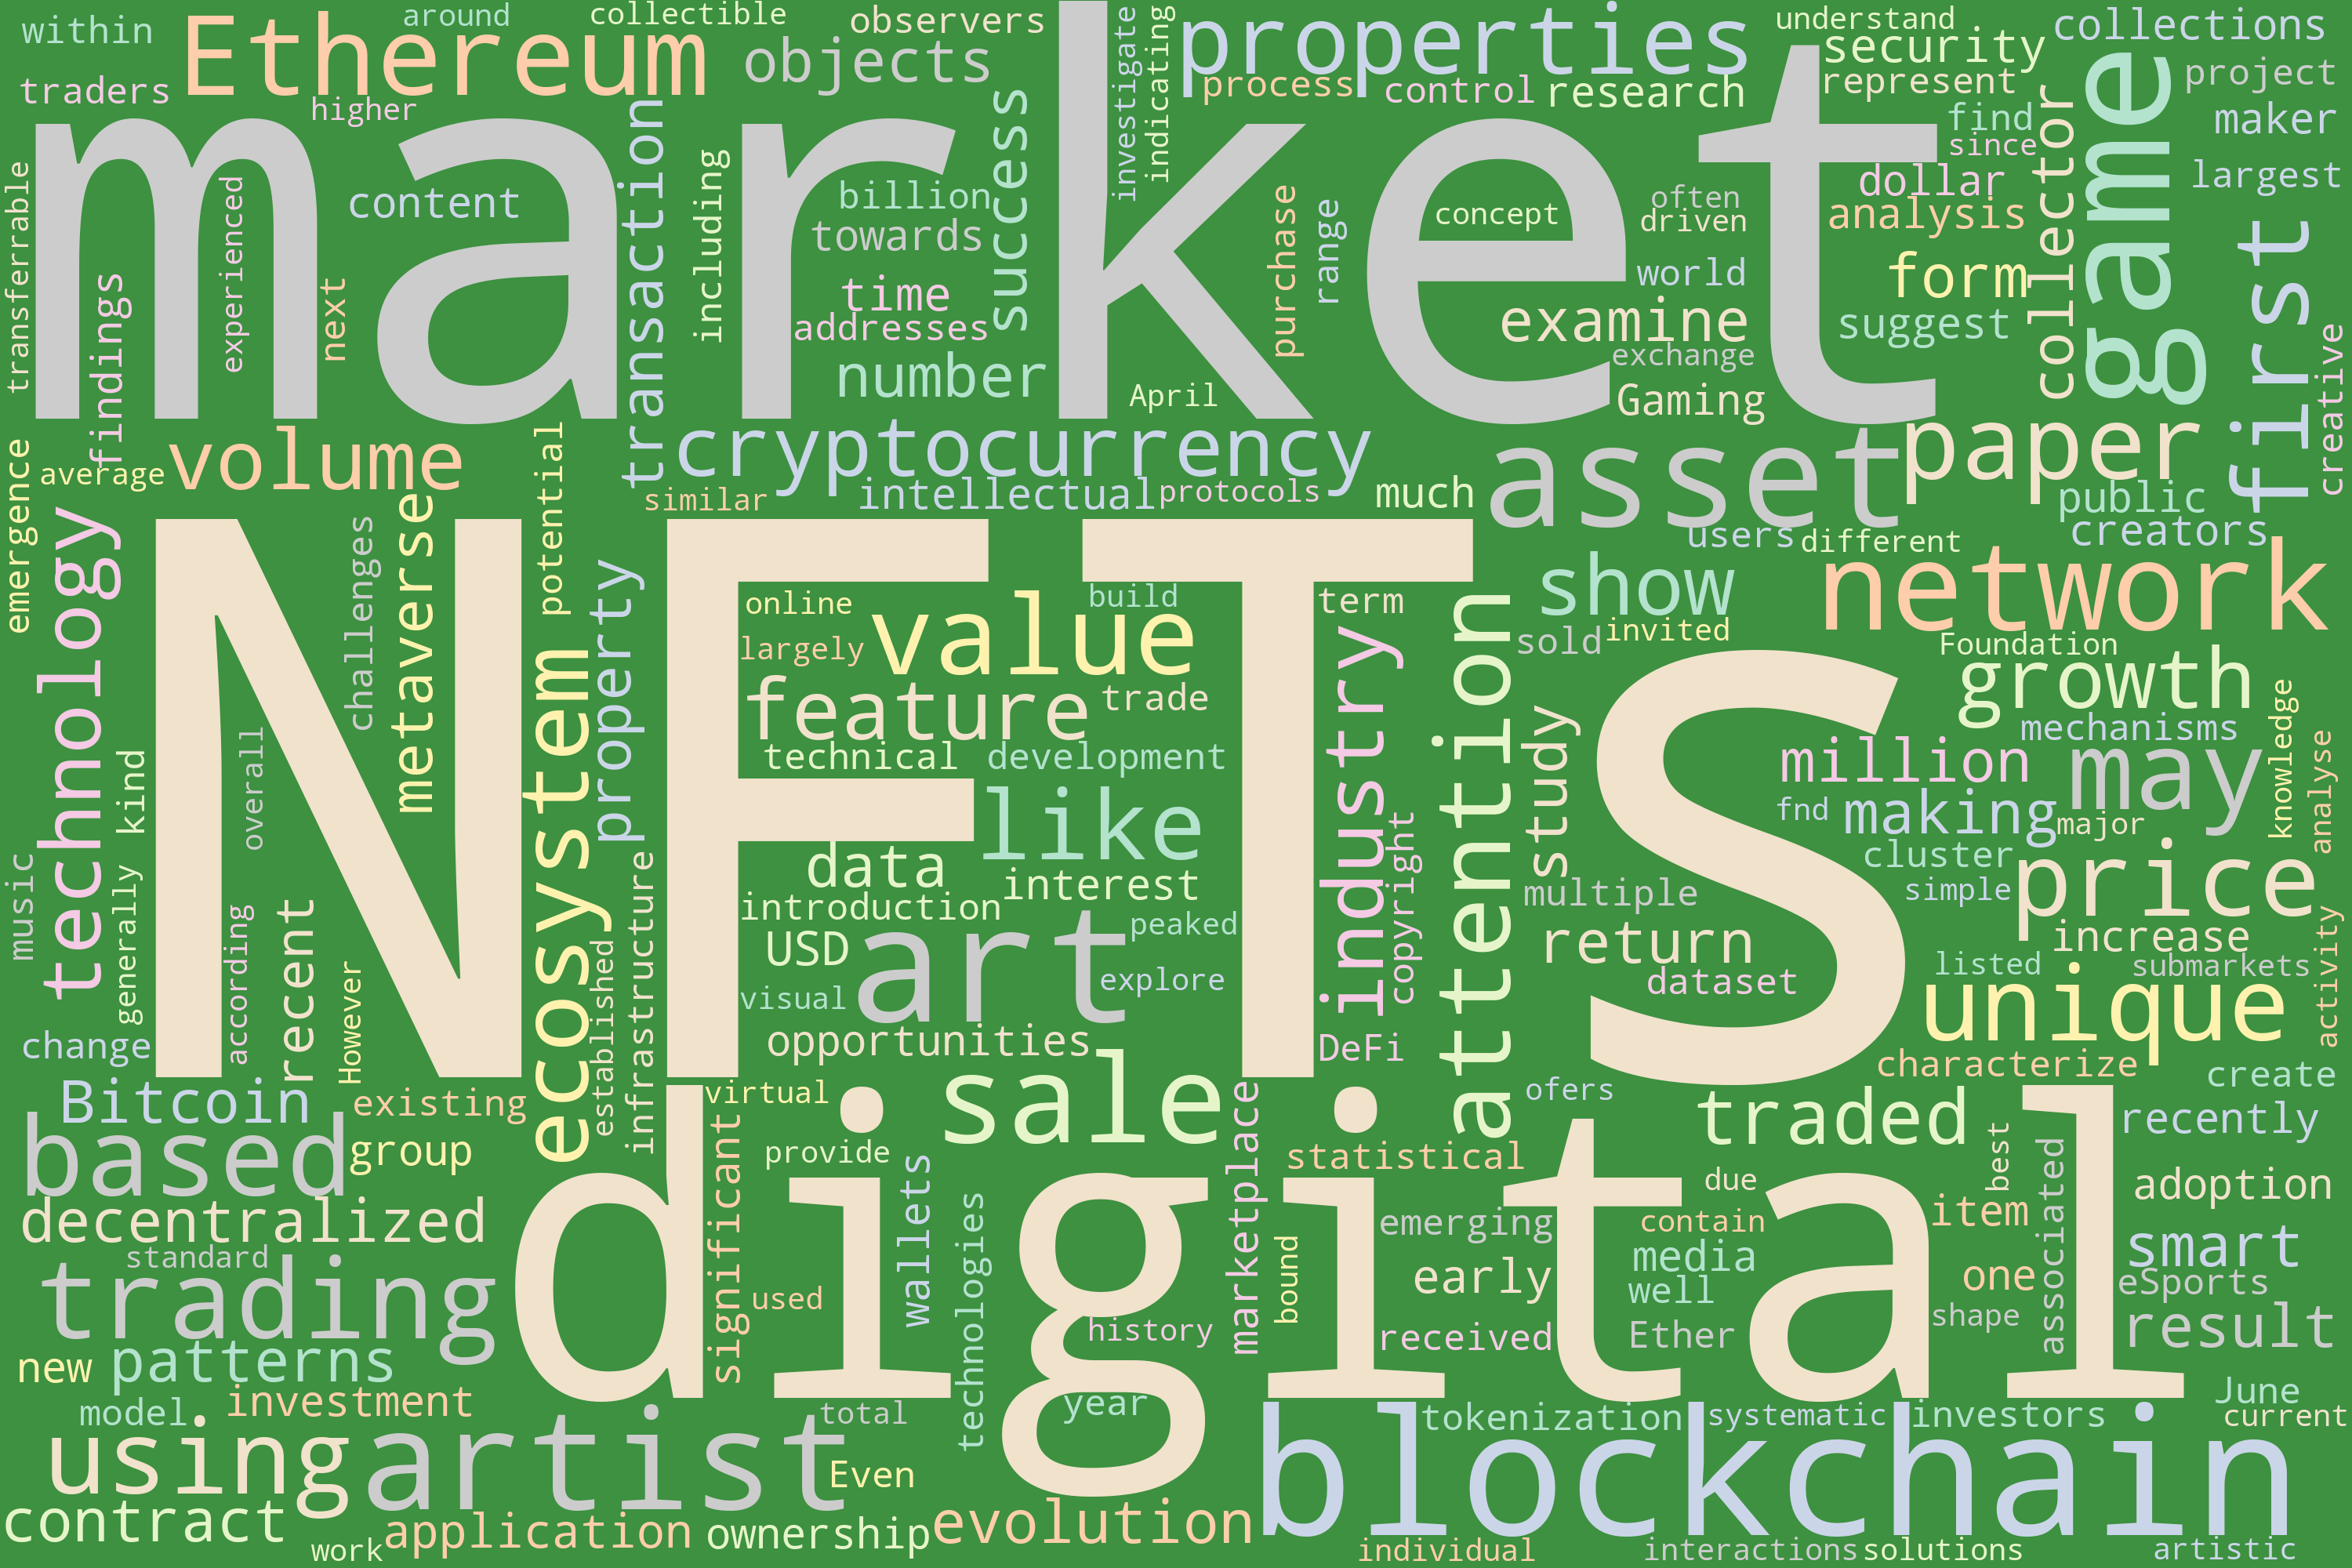

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

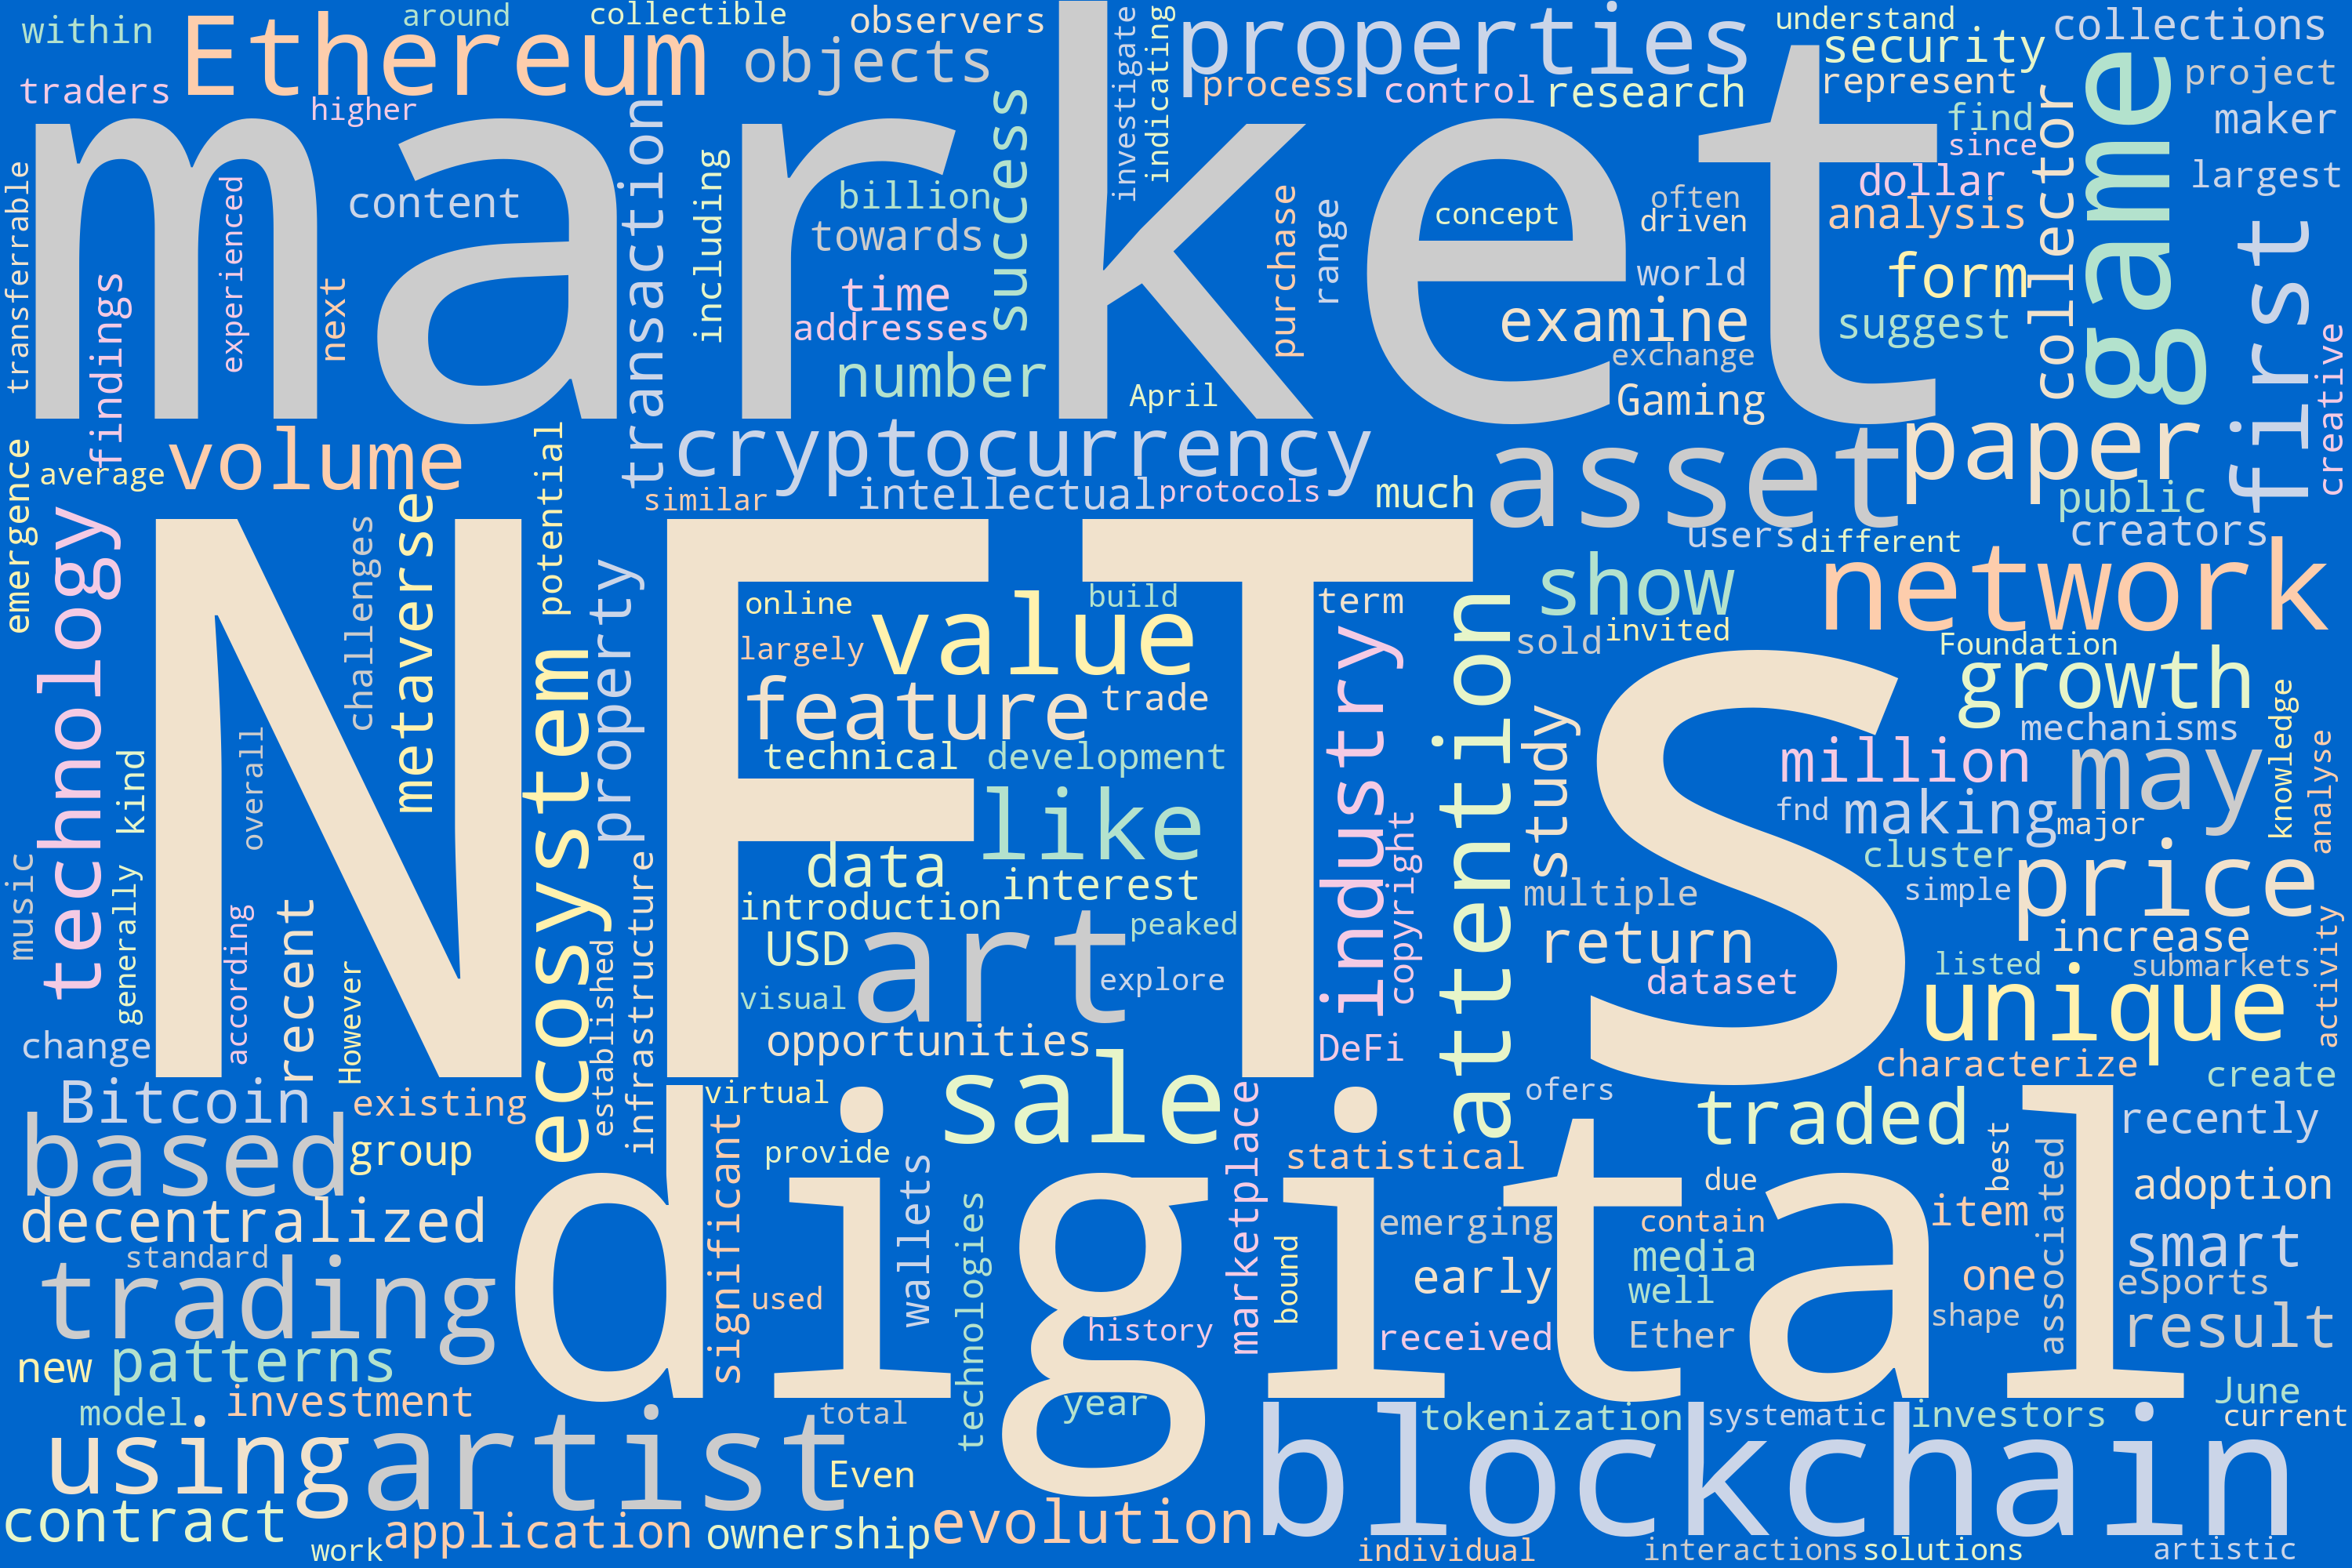

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part 2: Bigram
## 2.1 Title

In [ ]:
df.columns

Index(['Title', 'Abstract'], dtype='object')

In [ ]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
df_Title  = df['Title'].str.lower()

In [ ]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'non-fungible token  nft   overview, evaluation, opportunities and challenges  mapping the nft revolution  market trends, trade networks, and visual features  quantifying nft driven networks in crypto art  non-fungible token  nft  markets on the ethereum blockchain  temporal development, cointegration and interrelations  the non-fungible token  nft  market and its relationship with bitcoin and ethereum  tweetboost  influence of social media on nft valuation  understanding security issues in the nft ecosystem  the nft hype  what draws attention to non-fungible tokens   the evolution of nonfungible tokens  complexity and novelty of nft use-cases  non-fungible tokens  nft   the analysis of risk and return  non-fungible tokens  nft   innovation beyond the craze  nft, copyright and intellectual property commercialization  nft wash trading  quantifying suspicious behaviour in nft markets  blockchain based decentralized computing and nft infrastructure for game networks  what is non-fungible 

In [ ]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [ ]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['non-fungible',
 'token',
 'nft',
 'overview,',
 'evaluation,',
 'opportunity',
 'and',
 'challenge',
 'mapping',
 'the',
 'nft',
 'revolution',
 'market',
 'trends,',
 'trade',
 'networks,',
 'and',
 'visual',
 'feature',
 'quantifying',
 'nft',
 'driven',
 'network',
 'in',
 'crypto',
 'art',
 'non-fungible',
 'token',
 'nft',
 'market',
 'on',
 'the',
 'ethereum',
 'blockchain',
 'temporal',
 'development,',
 'cointegration',
 'and',
 'interrelation',
 'the',
 'non-fungible',
 'token',
 'nft',
 'market',
 'and',
 'it',
 'relationship',
 'with',
 'bitcoin',
 'and',
 'ethereum',
 'tweetboost',
 'influence',
 'of',
 'social',
 'medium',
 'on',
 'nft',
 'valuation',
 'understanding',
 'security',
 'issue',
 'in',
 'the',
 'nft',
 'ecosystem',
 'the',
 'nft',
 'hype',
 'what',
 'draw',
 'attention',
 'to',
 'non-fungible',
 'token',
 'the',
 'evolution',
 'of',
 'nonfungible',
 'token',
 'complexity',
 'and',
 'novelty',
 'of',
 'nft',
 'use-cases',
 'non-fungible',
 'token',
 'nft',
 '

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok']]
words_nsw

['non-fungible',
 'token',
 'nft',
 'overview,',
 'evaluation,',
 'opportunity',
 'challenge',
 'mapping',
 'nft',
 'revolution',
 'market',
 'trends,',
 'trade',
 'networks,',
 'visual',
 'feature',
 'quantifying',
 'nft',
 'driven',
 'network',
 'crypto',
 'art',
 'non-fungible',
 'token',
 'nft',
 'market',
 'ethereum',
 'blockchain',
 'temporal',
 'development,',
 'cointegration',
 'interrelation',
 'non-fungible',
 'token',
 'nft',
 'market',
 'relationship',
 'bitcoin',
 'ethereum',
 'tweetboost',
 'influence',
 'social',
 'medium',
 'nft',
 'valuation',
 'understanding',
 'security',
 'issue',
 'nft',
 'ecosystem',
 'nft',
 'hype',
 'draw',
 'attention',
 'non-fungible',
 'token',
 'evolution',
 'nonfungible',
 'token',
 'complexity',
 'novelty',
 'nft',
 'use-cases',
 'non-fungible',
 'token',
 'nft',
 'analysis',
 'risk',
 'return',
 'non-fungible',
 'token',
 'nft',
 'innovation',
 'beyond',
 'craze',
 'nft,',
 'copyright',
 'intellectual',
 'property',
 'commercialization',


In [ ]:
import collections

In [ ]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [ ]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0           (non-fungible, token)       8
1                    (token, nft)       7
2                   (nft, market)       3
74        (suspicious, behaviour)       1
72         (trading, quantifying)       1
71                (wash, trading)       1
70                    (nft, wash)       1
69       (commercialization, nft)       1
68  (property, commercialization)       1
67       (intellectual, property)       1
66      (copyright, intellectual)       1
65              (nft,, copyright)       1
64                  (craze, nft,)       1
63                (beyond, craze)       1
62           (innovation, beyond)       1
61              (nft, innovation)       1
60         (return, non-fungible)       1
59                 (risk, return)       1
58               (analysis, risk)       1
57                (nft, analysis)       1

In [ ]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                       bigram &  counts \\
\midrule
        (non-fungible, token) &       8 \\
                 (token, nft) &       7 \\
                (nft, market) &       3 \\
      (suspicious, behaviour) &       1 \\
       (trading, quantifying) &       1 \\
              (wash, trading) &       1 \\
                  (nft, wash) &       1 \\
     (commercialization, nft) &       1 \\
(property, commercialization) &       1 \\
     (intellectual, property) &       1 \\
    (copyright, intellectual) &       1 \\
            (nft,, copyright) &       1 \\
                (craze, nft,) &       1 \\
              (beyond, craze) &       1 \\
         (innovation, beyond) &       1 \\
            (nft, innovation) &       1 \\
       (return, non-fungible) &       1 \\
               (risk, return) &       1 \\
             (analysis, risk) &       1 \\
              (nft, analysis) &       1 \\
    (use-cases, non-fungible) &       1 \\
             (nf

In [ ]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                            |   counts |
|:----------------------------------|---------:|
| ('non-fungible', 'token')         |        8 |
| ('token', 'nft')                  |        7 |
| ('nft', 'market')                 |        3 |
| ('suspicious', 'behaviour')       |        1 |
| ('trading', 'quantifying')        |        1 |
| ('wash', 'trading')               |        1 |
| ('nft', 'wash')                   |        1 |
| ('commercialization', 'nft')      |        1 |
| ('property', 'commercialization') |        1 |
| ('intellectual', 'property')      |        1 |
| ('copyright', 'intellectual')     |        1 |
| ('nft,', 'copyright')             |        1 |
| ('craze', 'nft,')                 |        1 |
| ('beyond', 'craze')               |        1 |
| ('innovation', 'beyond')          |        1 |
| ('nft', 'innovation')             |        1 |
| ('return', 'non-fungible')        |        1 |
| ('risk', 'return')                |        1 |
| ('analysis', 'risk

In [ ]:
title_bigram.to_csv("title_bigram.csv")

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [ ]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [ ]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

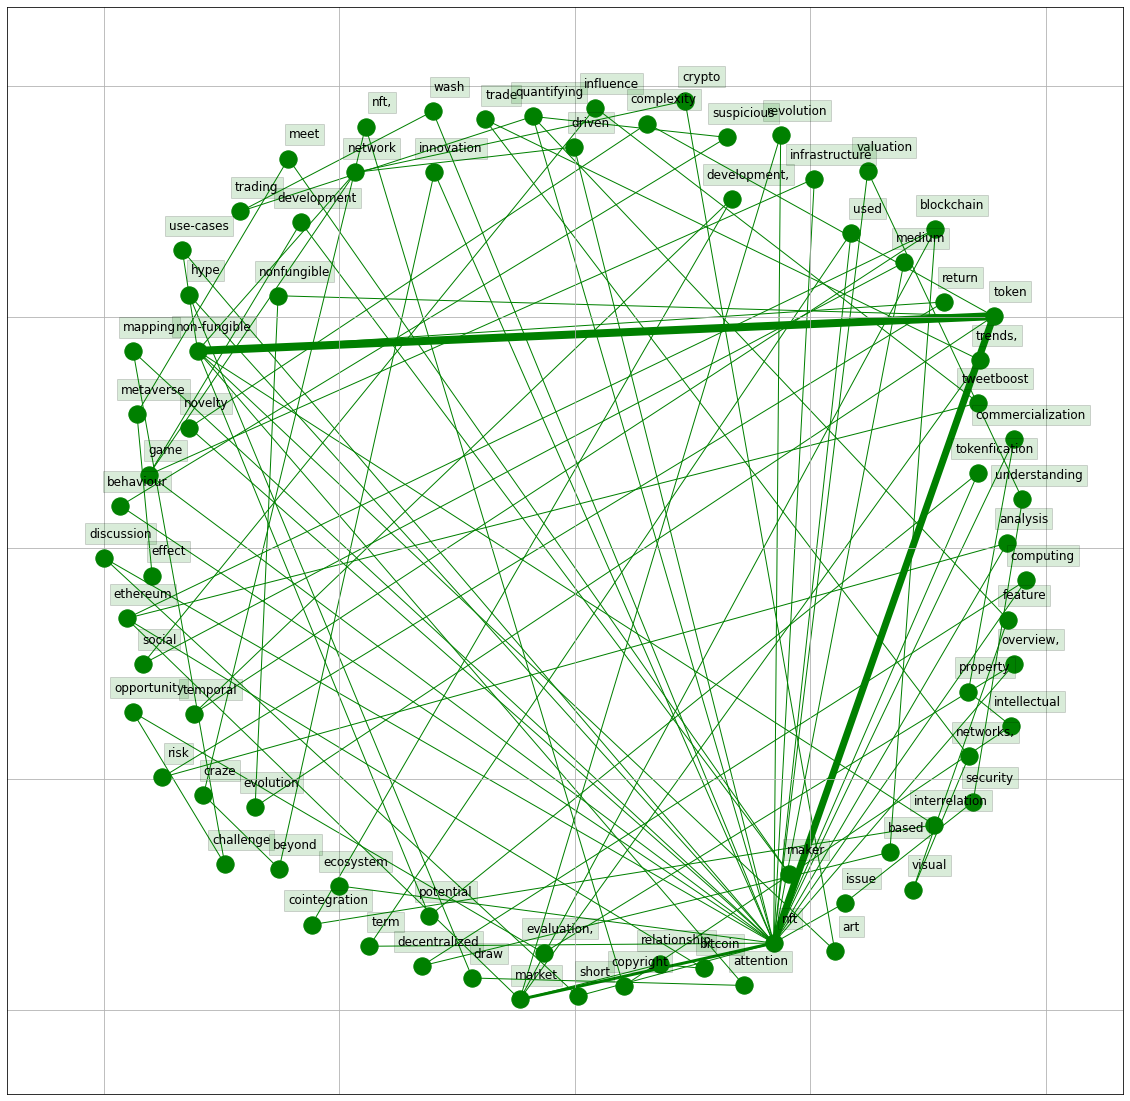

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [ ]:
import igviz as ig

In [ ]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [ ]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-58-360256bff3c0>:1: DeprecationWarning: Argument `titlefont_size` is deprecated and will be removed in 0.6.0.
  fig = ig.plot(


## 2.2 Abstract

In [ ]:
df_Abstract = df['Abstract'].str.lower()

In [ ]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"the non-fungible token  nft  market is mushrooming in recent years  the concept of nft originally comes from token standard of ethereum  aiming to distinguish each token with distinguishable signs  this type of token can be bound with virtual/digital properties as their unique identifications  with nfts  all marked properties can be freely traded with customized values according to their ages  rarity  liquidity  etc  it has greatly stimulated the prosperity of the decentralized application  dapp  market  at the time of writing  may the total money used on completed nft sales has reached usd  the thousandfold return on its increasing market draws huge attention worldwide  however  the development of the nft ecosystem is still in its early stage  and the technologies of nfts are pre-mature  newcomers may get lost in their frenetic evolution due to the lack of systematic summaries  in this technical report  we explore the nft ecosystems in several aspects  we start with an overview of st

In [ ]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [ ]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['the',
 'non-fungible',
 'token',
 'nft',
 'market',
 'is',
 'mushrooming',
 'in',
 'recent',
 'year',
 'the',
 'concept',
 'of',
 'nft',
 'originally',
 'come',
 'from',
 'token',
 'standard',
 'of',
 'ethereum',
 'aiming',
 'to',
 'distinguish',
 'each',
 'token',
 'with',
 'distinguishable',
 'sign',
 'this',
 'type',
 'of',
 'token',
 'can',
 'be',
 'bound',
 'with',
 'virtual/digital',
 'property',
 'a',
 'their',
 'unique',
 'identification',
 'with',
 'nfts',
 'all',
 'marked',
 'property',
 'can',
 'be',
 'freely',
 'traded',
 'with',
 'customized',
 'value',
 'according',
 'to',
 'their',
 'age',
 'rarity',
 'liquidity',
 'etc',
 'it',
 'ha',
 'greatly',
 'stimulated',
 'the',
 'prosperity',
 'of',
 'the',
 'decentralized',
 'application',
 'dapp',
 'market',
 'at',
 'the',
 'time',
 'of',
 'writing',
 'may',
 'the',
 'total',
 'money',
 'used',
 'on',
 'completed',
 'nft',
 'sale',
 'ha',
 'reached',
 'usd',
 'the',
 'thousandfold',
 'return',
 'on',
 'it',
 'increasing',
 '

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha']]
words_nsw

['non-fungible',
 'token',
 'nft',
 'market',
 'mushrooming',
 'recent',
 'year',
 'concept',
 'nft',
 'originally',
 'come',
 'token',
 'standard',
 'ethereum',
 'aiming',
 'distinguish',
 'token',
 'distinguishable',
 'sign',
 'type',
 'token',
 'bound',
 'virtual/digital',
 'property',
 'unique',
 'identification',
 'nfts',
 'marked',
 'property',
 'freely',
 'traded',
 'customized',
 'value',
 'according',
 'age',
 'rarity',
 'liquidity',
 'etc',
 'greatly',
 'stimulated',
 'prosperity',
 'decentralized',
 'application',
 'dapp',
 'market',
 'time',
 'writing',
 'may',
 'total',
 'money',
 'used',
 'completed',
 'nft',
 'sale',
 'reached',
 'usd',
 'thousandfold',
 'return',
 'increasing',
 'market',
 'draw',
 'huge',
 'attention',
 'worldwide',
 'however',
 'development',
 'nft',
 'ecosystem',
 'still',
 'early',
 'stage',
 'technology',
 'nfts',
 'pre-mature',
 'newcomer',
 'may',
 'get',
 'lost',
 'frenetic',
 'evolution',
 'due',
 'lack',
 'systematic',
 'summary',
 'technical'

In [ ]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [ ]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0      (non-fungible, token)      12
1              (token, nfts)      10
2              (nft, market)       7
3                (nft, sale)       5
4           (nft, ecosystem)       5
5           (digital, asset)       5
6             (digital, art)       5
7          (smart, contract)       4
8   (blockchain, technology)       4
9   (intellectual, property)       4
13              (nft, asset)       3
14         (trading, volume)       3
12  (cryptocurrency, market)       3
11    (ethereum, blockchain)       3
10              (token, nft)       3
46      (industry, observer)       2
38         (growth, trading)       2
39  (decentralized, finance)       2
40           (finance, defi)       2
41             (dollar, nft)       2
42           (digital, item)       2
43          (nfts, recently)       2
44              (next, week)       2
45        (content, creator)       2
54        (maker, education)       2

In [ ]:
print(abstract_bigram.head(90).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                      bigram &  counts \\
\midrule
       (non-fungible, token) &      12 \\
               (token, nfts) &      10 \\
               (nft, market) &       7 \\
                 (nft, sale) &       5 \\
            (nft, ecosystem) &       5 \\
            (digital, asset) &       5 \\
              (digital, art) &       5 \\
           (smart, contract) &       4 \\
    (blockchain, technology) &       4 \\
    (intellectual, property) &       4 \\
                (nft, asset) &       3 \\
           (trading, volume) &       3 \\
    (cryptocurrency, market) &       3 \\
      (ethereum, blockchain) &       3 \\
                (token, nft) &       3 \\
        (industry, observer) &       2 \\
           (growth, trading) &       2 \\
    (decentralized, finance) &       2 \\
             (finance, defi) &       2 \\
               (dollar, nft) &       2 \\
             (digital, item) &       2 \\
            (nfts, recently) &       2

In [ ]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                       |   counts |
|:-----------------------------|---------:|
| ('non-fungible', 'token')    |       12 |
| ('token', 'nfts')            |       10 |
| ('nft', 'market')            |        7 |
| ('nft', 'sale')              |        5 |
| ('nft', 'ecosystem')         |        5 |
| ('digital', 'asset')         |        5 |
| ('digital', 'art')           |        5 |
| ('smart', 'contract')        |        4 |
| ('blockchain', 'technology') |        4 |
| ('intellectual', 'property') |        4 |
| ('nft', 'asset')             |        3 |
| ('trading', 'volume')        |        3 |
| ('cryptocurrency', 'market') |        3 |
| ('ethereum', 'blockchain')   |        3 |
| ('token', 'nft')             |        3 |
| ('industry', 'observer')     |        2 |
| ('growth', 'trading')        |        2 |
| ('decentralized', 'finance') |        2 |
| ('finance', 'defi')          |        2 |
| ('dollar', 'nft')            |        2 |
| ('digital', 'item')          |

In [ ]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [ ]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [ ]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

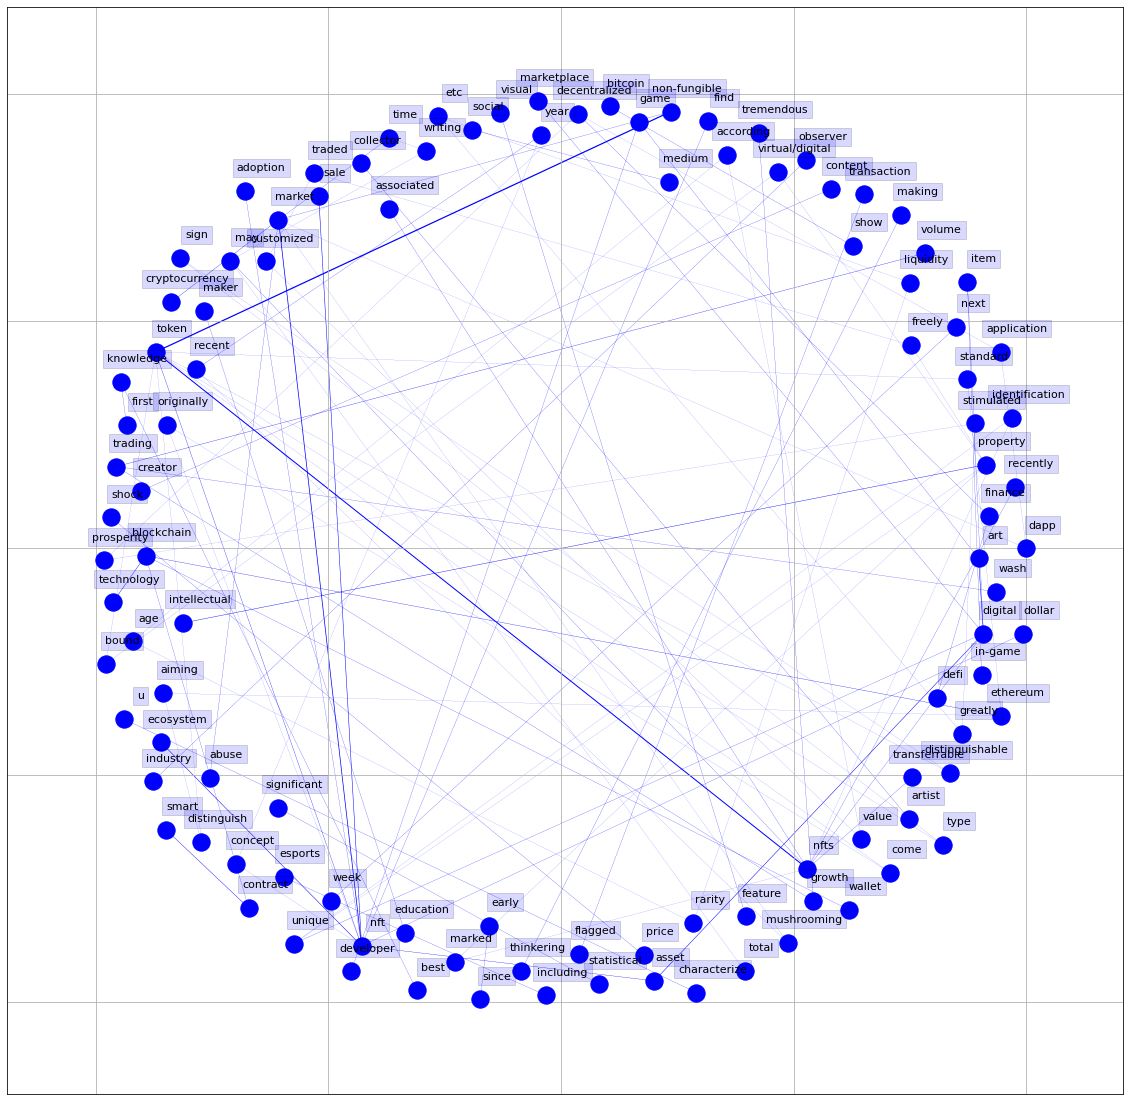

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [ ]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [ ]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-76-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

